In [3]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

In [4]:
import os, sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from project.data.make_steps import make_data_dict, step_detection

In [5]:
data_dict = make_data_dict('00010100_s001_t000')
steps = step_detection(data_dict, 'FP1')
step1 = steps[0]
data = data_dict['FP1'][step1[0]:step1[1] - 10000]
print(data)

[ 3.84556184e-05  3.67771529e-05  3.40305730e-05 ... -2.28846657e-05
 -2.33424290e-05 -2.05958491e-05]


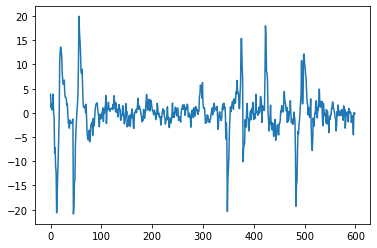

In [7]:
import numpy as np
amplified_data = (data * np.power(10, 5))[:60000:100]
plt.plot(amplified_data)
plt.show()

            0
0    3.845562
1    1.083723
2    1.800886
3    0.610701
4    1.541486
..        ...
595 -2.349502
596 -4.531507
597 -0.106461
598  0.076644
599 -0.167497

[600 rows x 1 columns]
      0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
..   ..
595 NaN
596 NaN
597 NaN
598 NaN
599 NaN

[600 rows x 1 columns]


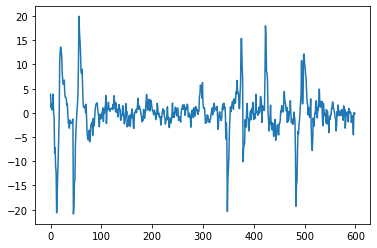

In [8]:
import pandas as pd
df = pd.DataFrame(data=amplified_data)
print(df)
roll_mean = df.rolling(window=10000).mean() # use hmm to determine window sizes??
roll_std = df.rolling(window=10000).std()
print(roll_mean)
plt.clf()
plt.plot(amplified_data)
plt.plot(roll_mean)
plt.plot(roll_std)
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
dickey_fuller = adfuller(amplified_data)

In [7]:
print('ADF Statistic: %f' % dickey_fuller[0])
print('p-value: %f' % dickey_fuller[1])
print('Critical Values:')
for key, value in dickey_fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.303966
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


/Users/ishan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


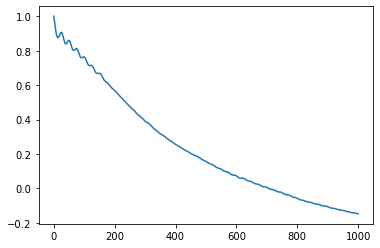

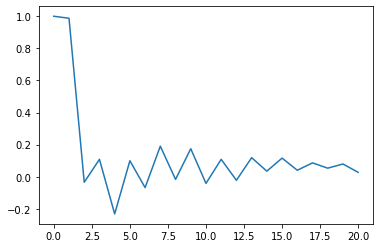

In [8]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(amplified_data, nlags=1000)
lag_pacf = pacf(amplified_data, nlags=20, method='ols')
plt.clf()
plt.plot(lag_acf)
plt.show()
plt.plot(lag_pacf)
plt.show()

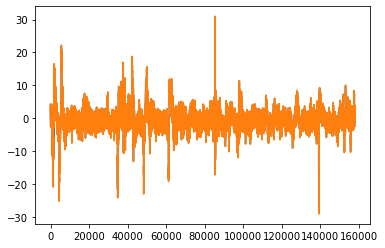

Residual: 3.786408452544824


In [13]:
from statsmodels.tsa.arima_model import ARIMA
ar_model = ARIMA(amplified_data, order=(1,0,0))
ar_results = ar_model.fit(disp=True)
plt.plot(ar_results.fittedvalues)
plt.plot(amplified_data)
plt.show()
print(f"Residual: {sum((ar_results.fittedvalues - amplified_data))}")

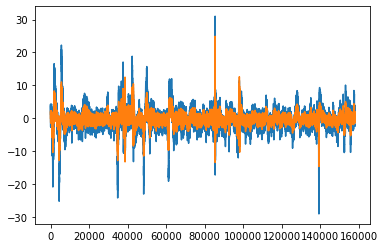

Residual: 369006.75735143136


In [15]:
ma_model = ARIMA(amplified_data, order=(0,0,1))
ma_results = ma_model.fit(disp=True)
plt.plot(amplified_data)
plt.plot(ma_results.fittedvalues)
plt.show()
print(f"Residual: {sum((ma_results.fittedvalues - amplified_data[-2]))}")

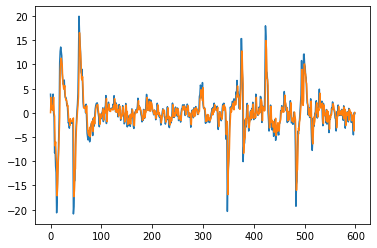

Residual: 119.05251016044917


In [16]:

arma_model = ARIMA(amplified_data, order=(1,0,0))
arma_results = arma_model.fit(disp=True)
plt.plot(amplified_data)
plt.plot(arma_results.fittedvalues)
plt.show()
print(f"Residual: {sum((arma_results.fittedvalues - amplified_data[-1]))}")

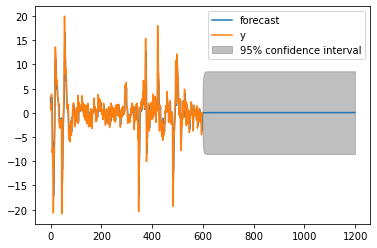

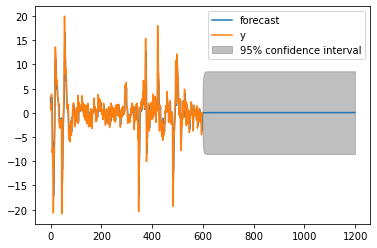

In [17]:
arma_results.plot_predict(1,2 * len(amplified_data))